# Hashed Fingerprints

In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

In [2]:
with open('./data/DOWNLOAD-ligands_for_serotonine_rec.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    serotonine_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

In [3]:
molecule = Chem.MolFromSmiles("CCO")
fp = Chem.GetMorganFingerprintAsBitVect(molecule, 2, nBits=1024)
# 2 for radius, 1024 for hashed bit vector length
fp.ToBitString()

'000000000000000000000000000000000100000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

### Fingerprints for ligand set and DrugBank

In [5]:
serotonine_ecfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in serotonine_ligands]

drugs_ecfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugs]

In [9]:
first_key = serotonine_ecfp[0]

serotonine_ecfp_sums = [sum(1 for key in serotonine_ecfp if key.GetBit(bit)) for bit in range(first_key.GetNumBits())]
serotonine_ecfp_sums



[51,
 374,
 87,
 109,
 259,
 36,
 9,
 30,
 261,
 23,
 52,
 93,
 14,
 83,
 179,
 555,
 21,
 16,
 19,
 102,
 34,
 41,
 9,
 57,
 35,
 172,
 19,
 19,
 8,
 117,
 15,
 33,
 26,
 1395,
 56,
 20,
 301,
 29,
 9,
 46,
 35,
 59,
 113,
 67,
 9,
 137,
 111,
 10,
 14,
 21,
 23,
 18,
 19,
 45,
 19,
 5,
 8,
 30,
 110,
 113,
 26,
 53,
 37,
 130,
 1085,
 24,
 14,
 21,
 41,
 22,
 12,
 33,
 57,
 179,
 508,
 45,
 21,
 155,
 25,
 32,
 1298,
 53,
 22,
 17,
 102,
 21,
 69,
 28,
 26,
 31,
 517,
 16,
 40,
 7,
 52,
 131,
 60,
 31,
 21,
 47,
 6,
 16,
 92,
 9,
 61,
 36,
 26,
 21,
 13,
 15,
 19,
 21,
 47,
 18,
 186,
 47,
 54,
 60,
 52,
 176,
 9,
 636,
 12,
 25,
 17,
 69,
 36,
 14,
 806,
 24,
 212,
 39,
 10,
 22,
 13,
 8,
 282,
 10,
 131,
 245,
 92,
 21,
 10,
 44,
 66,
 71,
 15,
 288,
 10,
 16,
 19,
 27,
 21,
 12,
 16,
 39,
 7,
 40,
 25,
 10,
 20,
 4,
 72,
 15,
 32,
 85,
 19,
 25,
 17,
 38,
 33,
 51,
 24,
 18,
 10,
 712,
 38,
 19,
 8,
 28,
 28,
 21,
 39,
 16,
 72,
 33,
 26,
 17,
 8,
 16,
 15,
 214,
 71,
 52,
 21,
 1

In [12]:
drugbank_ecfp_sums = [sum(1 for key in drugs_ecfp if key.GetBit(bit)) for bit in range(first_key.GetNumBits())]
drugbank_ecfp_sums

[120,
 2360,
 285,
 317,
 939,
 231,
 29,
 138,
 213,
 303,
 260,
 258,
 68,
 665,
 227,
 828,
 103,
 104,
 93,
 187,
 118,
 203,
 63,
 237,
 154,
 162,
 127,
 111,
 62,
 211,
 69,
 172,
 159,
 4264,
 155,
 110,
 1076,
 73,
 87,
 207,
 79,
 440,
 648,
 112,
 79,
 261,
 319,
 76,
 52,
 97,
 89,
 123,
 245,
 271,
 100,
 63,
 105,
 85,
 158,
 178,
 69,
 179,
 204,
 219,
 2683,
 147,
 55,
 173,
 97,
 226,
 77,
 346,
 179,
 389,
 255,
 465,
 76,
 283,
 134,
 479,
 4939,
 170,
 152,
 122,
 313,
 87,
 270,
 124,
 108,
 105,
 1541,
 90,
 160,
 54,
 308,
 97,
 114,
 158,
 96,
 87,
 61,
 119,
 402,
 60,
 194,
 160,
 246,
 79,
 173,
 84,
 162,
 73,
 534,
 56,
 797,
 155,
 396,
 608,
 349,
 767,
 78,
 767,
 117,
 165,
 82,
 193,
 109,
 47,
 2503,
 89,
 337,
 123,
 98,
 162,
 127,
 52,
 625,
 56,
 515,
 399,
 667,
 59,
 125,
 150,
 289,
 199,
 99,
 2458,
 86,
 79,
 106,
 104,
 370,
 64,
 67,
 126,
 66,
 183,
 282,
 48,
 161,
 45,
 232,
 135,
 134,
 262,
 107,
 98,
 73,
 96,
 130,
 261,
 137,
 202,


In [14]:
serotonine_ecfp_scaled = [x/len(serotonine_ecfp) for x in serotonine_ecfp_sums]
drugs_ecfp_scaled = [x/len(drugs_ecfp) for x in drugbank_ecfp_sums]
drugs_ecfp_scaled

[0.016865776528460996,
 0.33169360505973294,
 0.04005621925509487,
 0.04455375966268447,
 0.1319747013352073,
 0.03246661981728742,
 0.004075895994378074,
 0.019395643007730147,
 0.02993675333801827,
 0.04258608573436402,
 0.036542515811665496,
 0.03626141953619114,
 0.009557273366127899,
 0.09346451159522136,
 0.03190442726633872,
 0.11637385804638088,
 0.014476458186929024,
 0.014617006324666199,
 0.013070976809557273,
 0.026282501756851723,
 0.016584680252986646,
 0.02853127196064652,
 0.008854532677442024,
 0.03330990864371047,
 0.021644413211524948,
 0.022768798313422347,
 0.017849613492621222,
 0.015600843288826423,
 0.00871398453970485,
 0.02965565706254392,
 0.009697821503865073,
 0.024174279690794095,
 0.02234715390021082,
 0.5992972593113142,
 0.02178496134926212,
 0.015460295151089248,
 0.15122979620520027,
 0.010260014054813773,
 0.012227687983134224,
 0.02909346451159522,
 0.011103302881236824,
 0.06184118060435699,
 0.09107519325368939,
 0.015741391426563597,
 0.011103302

In [15]:
# compute the differences, store bit numbers prior to sorting
serotonine_drugbank_differences = [(i, a_b[0] - a_b[1])
                             for i, a_b in enumerate(zip(serotonine_ecfp_scaled, drugs_ecfp_scaled))]
# let's sort the bits by the difference in bit incidence between our ligand set and the DrugBank database
serotonine_drugbank_differences.sort(key=lambda x: x[1])
serotonine_drugbank_differences[:3], serotonine_drugbank_differences[-3:]

([(147, -0.19194919889059872),
  (807, -0.14689130894068958),
  (1, -0.13233326390834702)],
 [(767, 0.26925936525584104),
  (926, 0.27026545317784134),
  (456, 0.2959123417147772)])

In [16]:
bitinfo = {} # dict to store info about what bits were set by what atoms
ethanol = Chem.MolFromSmiles("CCO")
fp = Chem.GetMorganFingerprintAsBitVect(ethanol, 2, nBits=1024, bitInfo=bitinfo)
list(fp.GetOnBits()), bitinfo

([33, 80, 222, 294, 386, 807],
 {33: ((0, 0),),
  80: ((1, 0),),
  222: ((2, 1),),
  294: ((0, 1),),
  386: ((1, 1),),
  807: ((2, 0),)})

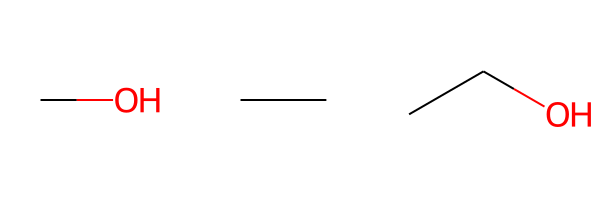

In [17]:
submols = []
for bit, atom_radius in bitinfo.items():
    atom, radius = atom_radius[0]
    if radius == 0: # radius 0 means just the atom, not useful as path
        continue
    hit_atoms = Chem.FindAtomEnvironmentOfRadiusN(ethanol, radius, atom)
    submols.append(Chem.PathToSubmol(ethanol, hit_atoms))
Draw.MolsToGridImage(submols)

In [18]:
def substructures_of_bit_ecfp4_1024(mol, bit):
    bitinfo = {}
    Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, bitInfo=bitinfo)
    hit_atoms = [Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atom)
                 for atom, radius in bitinfo.get(bit, [])
                 if radius > 0]
    submols = [Chem.PathToSubmol(mol, hit_atm) for hit_atm in hit_atoms]
    return submols

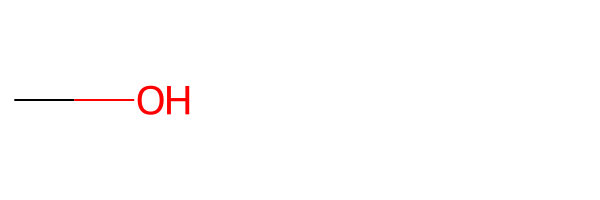

In [30]:
acetic_acid = Chem.MolFromSmiles("CC(O)=O")
Draw.MolsToGridImage(substructures_of_bit_ecfp4_1024(acetic_acid, 389))

In [27]:
benzene = Chem.MolFromSmiles("c1ccccc1")
Draw.MolsToGridImage(substructures_of_bit_ecfp4_1024(benzene, 64))

AtomKekulizeException: non-ring atom 0 marked aromatic

In [31]:
Chem.GetMorganFingerprintAsBitVect(benzene, 2, nBits=1024, bitInfo=bitinfo)
bitinfo

{64: ((1, 1), (2, 1), (3, 1), (4, 1), (0, 1), (5, 1)),
 389: ((2, 2), (3, 2), (1, 2), (0, 2), (5, 2), (4, 2)),
 849: ((0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0))}

In [32]:
substructure_smiles = {}
for ligand in serotonine_ligands:
    for substr in substructures_of_bit_ecfp4_1024(ligand, 456):
        subsmiles = Chem.MolToSmiles(substr)
        substructure_smiles[subsmiles] = substructure_smiles.get(subsmiles, 0) + 1
substructure_smiles

{'CCN': 2795,
 'cC(=O)O': 38,
 'CC[C@@H](C(C)C)C(C)(C)C': 1,
 'CC(=O)O': 5,
 'CCn': 11,
 'CCC(CC)N(C)C': 2,
 'cnc(cn)C(N)=O': 1,
 'ccc(c(c)Cl)N(C)C': 1,
 'CC(C)C': 1,
 'cnc(c(c)C)N(C)c': 1,
 'cC[C@H](C(C)C)N(C)C': 1}

In [33]:
substructure_smiles_db = {}
for drug in drugs:
    for submol in substructures_of_bit_ecfp4_1024(drug, 456):
        subsmiles = Chem.MolToSmiles(submol)
        substructure_smiles_db[subsmiles] = substructure_smiles_db.get(subsmiles, 0) + 1
substructure_smiles_db

{'CCN': 1779,
 'cC(=O)O': 319,
 'CC(=O)O': 79,
 'cnc(c(c)C)N(C)c': 1,
 'CCn': 22,
 'cnc(cn)C(N)=O': 1,
 'CC[C@@H](C(C)C)C(C)(C)C': 5,
 'CC(c)C': 3,
 'Cn(nn)c(n)=O': 1,
 'cC[C@H](NC)[C@@H](C)O': 1,
 'C=C(C)C': 2,
 'CC(C)CN(C)C': 7,
 'NC(=O)C[NH3+]': 6,
 'c[nH]c(c(c)C)[C@H](C)N': 1,
 'CC(=N)/C(C)=C(/C)N': 1,
 'cc(c)S(=O)(=O)O': 16,
 'CC[C@@H](CS)C(N)=O': 1,
 'cnc(co)C(C)C': 1,
 'cccn(c)C': 1,
 'CC(=O)S': 4,
 'CC(=O)C=O': 1,
 'CNC(=O)N(C)N': 1,
 'ccc(C)c(c)Cl': 2,
 'CN=CO': 1,
 'C[C@@H](N)CCS': 1,
 'cc(C)c(C)c(c)N': 1,
 'CCN(C(C)=O)N(C)C': 1,
 'CNCCN': 3,
 'cc(c)[C@H](CC)O[P@@H2]': 1,
 'c/N=C(\\N)N(c)C': 1,
 'CC[C@@H](C)N': 1,
 'cc(c)C(C(N)=O)(C(N)=O)N(C)C': 1,
 'cc(c)[C@H](NS)C(N)=O': 1,
 'ccc(-c([nH])n)c(c)N': 1,
 'CC(C)O[P@H](C)=O': 2,
 'cc(C)c(c(c)S)c(c)c': 1,
 'cc(n)[C@@](C)(NC)C(C)C': 1,
 'C[C@@H](O)CC(=O)O': 1,
 'cc(-c)cc(n)N': 2,
 'cC[C@H](C(C)C)N(C)C': 1}

Interesting, much more structures map to this bit in DrugBank than in the serotonine receptor ligand set. However, in both cases, the most prevalent structure is CCN. In the ligand set it's almost always CCN, in DrugBank it's a little bit more scattered.


And the second most prevalent bit...

In [34]:
substructure_smiles = {}
for ligand in serotonine_ligands:
    for substr in substructures_of_bit_ecfp4_1024(ligand, 926):
        subsmiles = Chem.MolToSmiles(substr)
        substructure_smiles[subsmiles] = substructure_smiles.get(subsmiles, 0) + 1
substructure_smiles

{'cCCNC': 36,
 'CC(C)C': 10,
 'CCCNC': 15,
 'CC(c)N': 5,
 'CC(C)O': 72,
 'C[C@@H](C)O': 1,
 'cc(C)cc(c)c': 3,
 'ccc(c(c)n)n(c)C': 1,
 'C=CCc(c)n': 1,
 'CCNC(C)C': 4,
 'ccc(nc)N(C)C': 2,
 'CC(c)C': 1,
 'cCC(=O)NC': 1,
 'cc(n)CCC': 1,
 'cC(C)C': 1,
 'CC(C)N': 1,
 'cncc(C)n': 1}

In [35]:
substructure_smiles_db = {}
for drug in drugs:
    for submol in substructures_of_bit_ecfp4_1024(drug, 926):
        subsmiles = Chem.MolToSmiles(submol)
        substructure_smiles_db[subsmiles] = substructure_smiles_db.get(subsmiles, 0) + 1
substructure_smiles_db

{'CC(C)C': 39,
 'CN(C)CC(=O)O': 2,
 'CC(C)N': 3,
 'CC(C)O': 384,
 'cc(n)CCC': 3,
 'cc(C)cc(c)c': 38,
 'cCC(=O)NC': 9,
 'CCNC(C)C': 5,
 'CC(=O)OC(C)O': 1,
 'cC(C)N': 10,
 'N=CN': 6,
 'CC(c)N': 20,
 'cCCNC': 9,
 'CCCNC': 2,
 'cncc(C)n': 2,
 'cc(c)C=C(C)N': 1,
 'CCN(CC)C(C)C': 2,
 'ccc(CS)c(c)N': 1,
 'cC(C)C': 1,
 'CNC(N)NC': 1,
 'CC(C)(C)O': 1,
 'CC[C@H](O)[C@H](C)N': 1,
 'CC(C)Cl': 1,
 'ccc(cc)c(c)[nH]': 6,
 'c/C=C(\\SC)C(N)=O': 7,
 'CCCC(C)C': 1,
 'CC(c)C': 1,
 'CCP(=O)(O)Cc': 1,
 'cc(c)S(=O)(=O)OC': 1,
 'cc(O)nc(c)Cl': 1,
 'c/C=C(/SC)C(N)=O': 1,
 'cc(n)-c(c(c)-c)n(C)o': 1,
 'cccnn': 2,
 'ccnn(c)C': 1,
 'cc(c)[C@H](OC)C(C)C': 1,
 'cnc(c(c)C)N(c)C': 1,
 'conc(c)C': 1,
 'C=C(C)N(C=O)Cc': 1,
 'cc(c)N(C)S(c)(=O)=O': 1}

Again the most responsible subsructure is the same for the two sets and the results are even more scattered. Most often bit 926 was set by CC(C)O, so we have some branching with oxygen (?).

Quite a wide variety of structures sets this bit, including aromatic, aliphatic, branched, linear... In general, the substructures identified in the serotonine receptor ligand set seem simpler.